![FIT_CTU_LOGO](https://fit.cvut.cz/media-a-pr/corporate-identity/logo-fit-en-cerna.svg)
# FIT ČVUT v Praze, [BI-PST](https://courses.fit.cvut.cz/BI-PST), ZS 2021/2022
## Domácí úloha - Daniel Bukač, Alexandr Czerný
## Data a parametry
Ze své trojice vyberte reprezentanta. Úlohu odevzdejte cvičícímu, ke kterému reprezentant přísluší podle původního přiřazení paralelek v Kosu. Parametry úlohy spočtěte následovně:

- K = den narození reprezentanta skupiny (1-31),
- L = počet písmen v příjmení reprezentanta,
- M = ((K+L)*47)mod(11)+1.

Načtěte datový soubor z R knihovny Sleuth2 podle následující tabulky:
  
|M|Datový soubor|Popis|
|:-:|:-------------:|:-----|
|1|case0101|skóre v kreativitě dle typu motivace|
|2|case0102|mzda dle pohlaví|
|3|case0201|délka humeru dle přežití vrabců|
|4|case0202|objem hipokampu dle schizofrenie|
|5|case0301|srážky dle ošetření mraků|
|6|case0302|koncentrace dioxinu dle vojenského působiště|
|7|case0402|doba řešení úkolu dle typu výuky geometrie|
|8|ex0112|krevní tlak dle diety|
|9|ex0211|přežití morčat dle typu experimentu|
|10|ex0221|váha dle přežití vrabců|
|11|ex0222|hladina cholesterolu dle prostředí|  

## Úkoly

1. **(1b)** Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.
2. **(1b)** Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.
3. **(3b)** Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.
4. **(1b)** Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.
5. **(1b)** Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.
6. **(1b)** Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.
7. **(2b)** Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

### Import potřebných knihoven a určení parametrů úlohy

In [1]:
### import required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import (
    norm,
    expon,
    uniform,
    ttest_1samp,
    ttest_ind,
    t as students_t_distr
)

Podle následujícího výpočtu jsme zvolili datovou sadu **case0302**:

In [2]:
K = 15
L = len("Bukac")
M = ((K + L) * 47) % (11) + 1
print(">>> K = {}, L = {}, M = {}".format(K, L, M))

>>> K = 15, L = 5, M = 6


### Úkol 1
(1b) **Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.**

#### Popis datové sady
Datová sada obsahuje data z výzkumu Armády Spojených států amerických, který proběhl v roce 1987. Cílem výzkumu bylo změřit koncentraci [TCDD](https://en.wikipedia.org/wiki/2,3,7,8-Tetrachlorodibenzodioxin) v krevních vzorcích válečných veteránů. TCDD je karcinogenní [dioxin](https://en.wikipedia.org/wiki/Dioxins_and_dioxin-like_compounds), jenž byl součástí herbicidu [Agent Orange](https://en.wikipedia.org/wiki/Agent_Orange), který Armádá Spojených států využívala k čištění úkrytů v džungli během [války ve Vietnamu](https://en.wikipedia.org/wiki/Vietnam_War) mezi lety 1962 až 1970.  
  
Datová sada obsahuje celkem 743 záznamů, z toho 646 záznamů se týka vojáků, kteří ve Vietnamu sloužili a naopak 97 záznamů vojáků, kteří ve Vietnamu nebyli. Datová sada je v csv formátu. Data jsou rozdělena do dvou sloupců, první sloupec `Dioxin` udává koncentraci TCDD v krevním vzorku daného vojáka, druhý sloupec `Veteran` nabývá pouze dvou hodnot, hodnota `Vietnam` respektive `Other` a indikuje, zda daný voják sloužil ve Vietnamu, či nikoliv. Výhodou je, že data už jsou očištěna, neobsahují nedefinované hodnoty a z naší strany tak nevyžadují žádné předzpracování. 

#### Načtení datové sady
K načtení datové sady jsme využili knihovnu [pandas](https://pandas.pydata.org/docs/index.html) a její datovou strukturu [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Dále jsme sadu dle zadání rozdělili na dvě skupiny. Dataframe pojemnovaný `data_vietnam` obsahuje záznamy veteránů, kteří sloužili ve válce ve Vietnamu a analogicky dataframe `data_other` obsahuje záznamy veteránů, kteří ve Vietnamu nesloužili.

In [3]:
### load and split dataset

data = pd.read_csv("./data.csv")
data_vietnam = data[data.Veteran == "Vietnam"]
data_other = data[~(data.Veteran == "Vietnam")]

### preview data
display(data)

,Dioxin,Veteran
0,0,Vietnam
1,0,Vietnam
2,0,Vietnam
3,0,Vietnam
4,0,Vietnam
...,...,...
738,9,Other
739,9,Other
740,10,Other
741,11,Other


#### Odhad parametrů jednotlivých skupin

K odhadu parametrů jsme využili statistické metody pandas dataframu, konkrétně metodu [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) pro odhad střední hodnoty pomocí výběrového průměru, metodu [var](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) pro odhad rozptylu pomocí výběrového rozptylu a metodu [median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html) pro získání mediánu.

#### Vietnam group

In [4]:
### vietnam group - estimate expected value, variance and median of given distributions

vietnam_expected_value = data_vietnam.Dioxin.mean()
vietnam_variance = data_vietnam.Dioxin.var()
vietnam_median = data_vietnam.Dioxin.median()

print("Vietnam group estimated parameters:")
print(">>> Expected value:", vietnam_expected_value)
print(">>> Variance:", vietnam_variance)
print(">>> Median:", vietnam_median)

Vietnam group estimated parameters:
>>> Expected value: 4.260061919504644
>>> Variance: 6.98342573259414
>>> Median: 4.0


#### Other group

In [5]:
### other group - estimate expected value, variance and median of given distributions

other_expected_value = data_other.Dioxin.mean()
other_variance = data_other.Dioxin.var()
other_median = data_other.Dioxin.median()

print("Other group estimated parameters:")
print(">>> Expected value:", other_expected_value)
print(">>> Variance:", other_variance)
print(">>> Median:", other_median)

Other group estimated parameters:
>>> Expected value: 4.185567010309279
>>> Variance: 5.298539518900344
>>> Median: 4.0


### Úkol 2
(1b) **Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.**

Pro vykreslení grafů jsme využili vizualizační knihovnu [seaborn](https://seaborn.pydata.org/). Počet přihrádek u histogramů jsme odhadli experimentálně.

#### Vietnam group

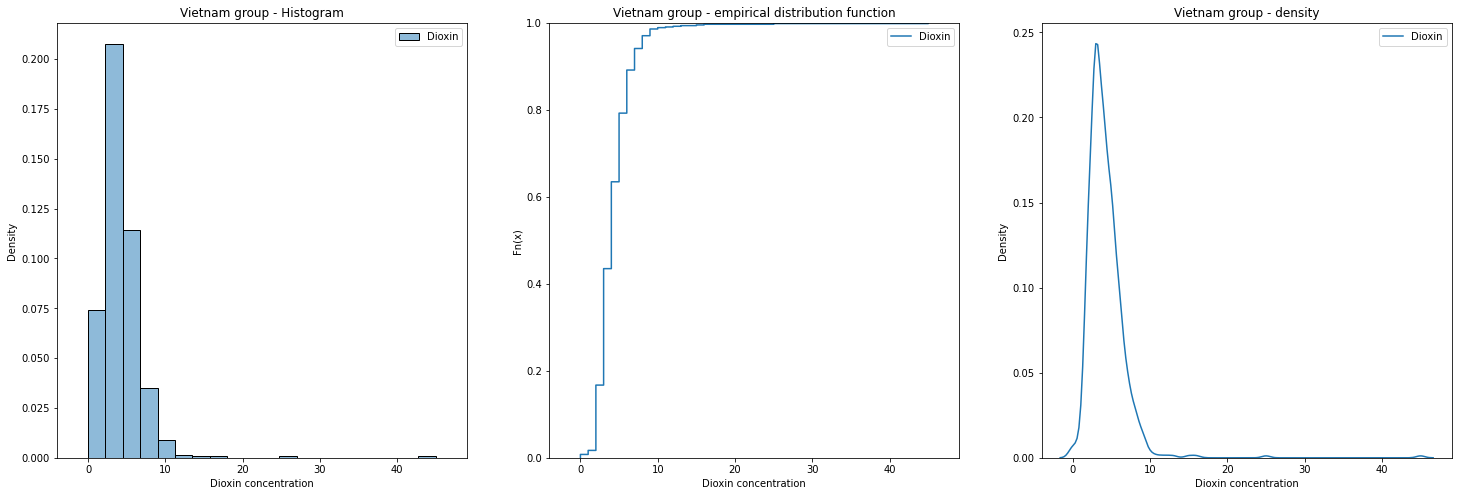

In [6]:
### vietnam group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(25, 8)
)
ax1 = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_vietnam,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_vietnam,
    bw_adjust=.75,
    ax=ax3
)
ax1 = ax1.set(
    title="Vietnam group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Vietnam group - empirical distribution function",
    xlabel="Dioxin concentration",
    ylabel="Fn(x)"
)
ax3 = ax3.set(
    title="Vietnam group - density",
    xlabel="Dioxin concentration"
)

#### Other group

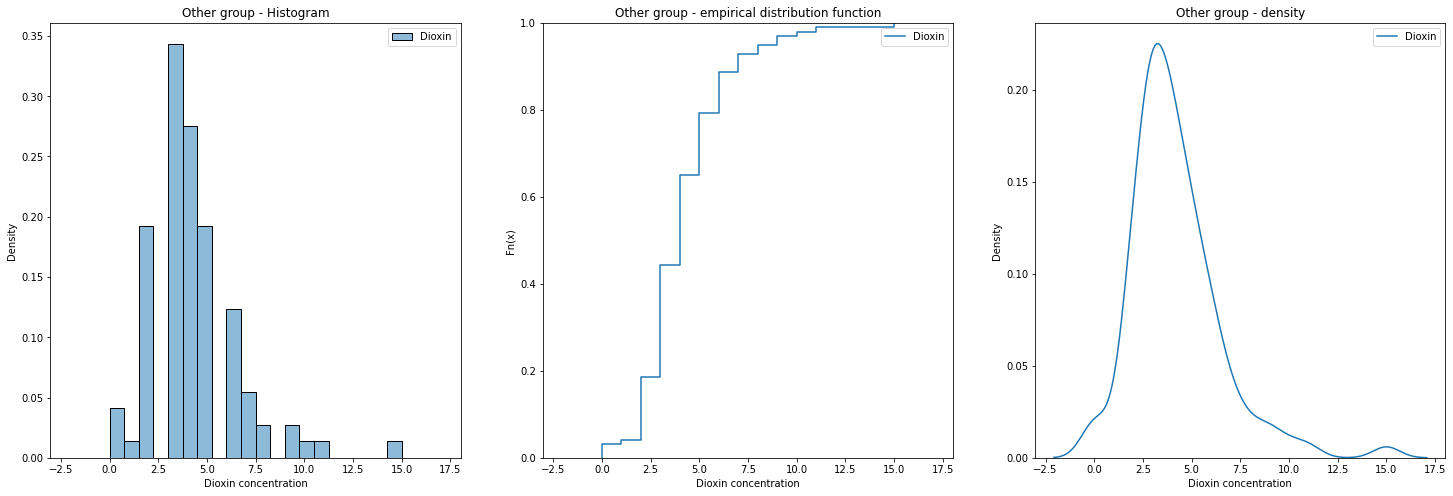

In [7]:
### other group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(25, 8)
)
ax1 = sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_other,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_other,
    bw_adjust=.75,
    ax=ax3
)
ax1 = ax1.set(
    title="Other group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Other group - empirical distribution function",
    xlabel="Dioxin concentration",
    ylabel="Fn(x)"
)
ax3 = ax3.set(
    title="Other group - density",
    xlabel="Dioxin concentration"
)

### Úkol 3
(3b) **Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.**

#### Odhad parametrů
Pro odhad parametrů jednotlivých rozdělení jsme využili knihovnu [scipy](https://scipy.org/) a příslušné třídy pro daná rozdělení. Konkrétně využíváme metodu [fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit), která se snaží najít nejpřesnější odhad daného rozdělení pro poskytnutá data a vrátí nám příslušné parametry daného rozdělení. K odhadu těchto parametrů můžeme využít buďto metodu MLE (Maximum Likelihood Estimate), nebo MM (Method of Moments), přičemž my jsme pro naše řešení zvolili metodu MLE.

#### Vietnam group

In [8]:
### vietnam group - estimated distribution parameters

viet_norm_distr_expected_value, viet_norm_distr_std_deviance = norm.fit(data_vietnam.Dioxin, method="MLE")
viet_expon_distr_expected_value, viet_expon_distr_std_deviance = expon.fit(data_vietnam.Dioxin, floc=0, method="MLE")
viet_uniform_distr_a, viet_uniform_distr_b = uniform.fit(data_vietnam.Dioxin, method="MLE")

print("Vietnam group - estimated distribution parameters")
print(">>> Normal distribution -> 𝝁 = {}, 𝛔 = {}".format(
    viet_norm_distr_expected_value,
    viet_norm_distr_std_deviance
))
print(">>> Exponential distribution -> 𝛌 = {}".format(
    1 / viet_expon_distr_std_deviance
))
print(">>> Uniform distribution -> 𝐚 = {}, 𝐛 = {}".format(
    viet_uniform_distr_a,
    viet_uniform_distr_a + viet_uniform_distr_b
))

Vietnam group - estimated distribution parameters
>>> Normal distribution -> 𝝁 = 4.260061919504644, 𝛔 = 2.6405710511255207
>>> Exponential distribution -> 𝛌 = 0.23473837209302323
>>> Uniform distribution -> 𝐚 = 0.0, 𝐛 = 45.0


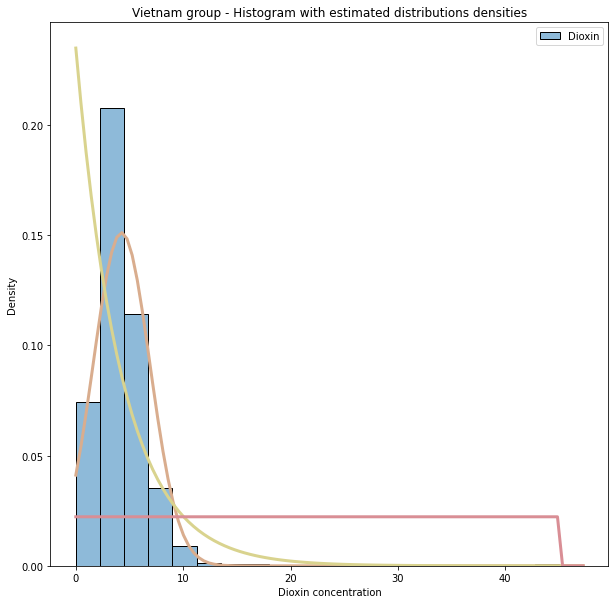

In [9]:
### vietnam group - distributions density visualization

fig, ax = plt.subplots(figsize=(10, 10))
ax = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    kde=False
)
ax = ax.set(
    title="Vietnam group - Histogram with estimated distributions densities",
    xlabel="Dioxin concentration"
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(
    x_axis_values, 
    viet_norm_distr_expected_value, 
    viet_norm_distr_std_deviance
)
expon_distr_pdf = expon.pdf(
    x_axis_values,
    viet_expon_distr_expected_value,
    viet_expon_distr_std_deviance
)
uniform_distr_pdf = uniform.pdf(
    x_axis_values,
    viet_uniform_distr_a,
    viet_uniform_distr_b
)
sb.lineplot(
    x=x_axis_values,
    y=norm_distr_pdf,
    color="#d9ad8e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=expon_distr_pdf,
    color="#d9d38e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=uniform_distr_pdf,
    color="#d98e95",
    linewidth=3
)
plt.show()

#### Diskuze

Odhadli jsme parametry pro jednotlivá rozdělení a příslušné hustoty jsme zanesli do grafu histogramu. Z výše uvedeného grafu je na první pohled zřejmé, že uniformní rozdělení našim pozorovaným datům neodpovídá, jelikož data ani zdaleka nejsou na daném intervalu rozložena rovnoměrně. Zbývá tedy rozhodnout mezi exponenciálním a normálním rozdělením. Po krátkém zkoumání jsme došli k závěru, že naše pozorovaná data nejvíce odpovídají normálnímu rozdělení, exponenciální rozdělení jsme vyloučili z toho důvodu, že zřejmě v prvním sloupci našeho histogramu je výrazně méně dat než ve sloupci vpravo od něj a to v situaci kdy pozorovaných dat máme relativní dostatek (643 záznamů), což neodpovídá exponenciálnímu rozdělení, a naopak data relativně dobře odpovídají normálnímu rozdělení a proto jsme normální rozdělení zvolili za nejbližší odhad pro naše pozorovaná data.

#### Other group

In [10]:
### other group - estimated distribution parameters

other_norm_distr_expected_value, other_norm_distr_std_deviance = norm.fit(data_other.Dioxin, method="MLE")
other_expon_distr_expected_value, other_expon_distr_std_deviance = expon.fit(data_other.Dioxin, method="MLE")
other_uniform_distr_a, other_uniform_distr_b = uniform.fit(data_other.Dioxin, method="MLE") 

print("Other group - estimated distribution parameters")
print(">>> Normal distribution -> 𝝁 = {}, 𝛔 = {}".format(
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
))
print(">>> Exponential distribution -> 𝛌 = {}".format(
    1 / other_expon_distr_std_deviance
))
print(">>> Uniform distribution -> 𝐚 = {}, 𝐛 = {}".format(
    other_uniform_distr_a,
    other_uniform_distr_a + other_uniform_distr_b
))

Other group - estimated distribution parameters
>>> Normal distribution -> 𝝁 = 4.185567010309279, 𝛔 = 2.2899596940009213
>>> Exponential distribution -> 𝛌 = 0.23891625615763545
>>> Uniform distribution -> 𝐚 = 0.0, 𝐛 = 15.0


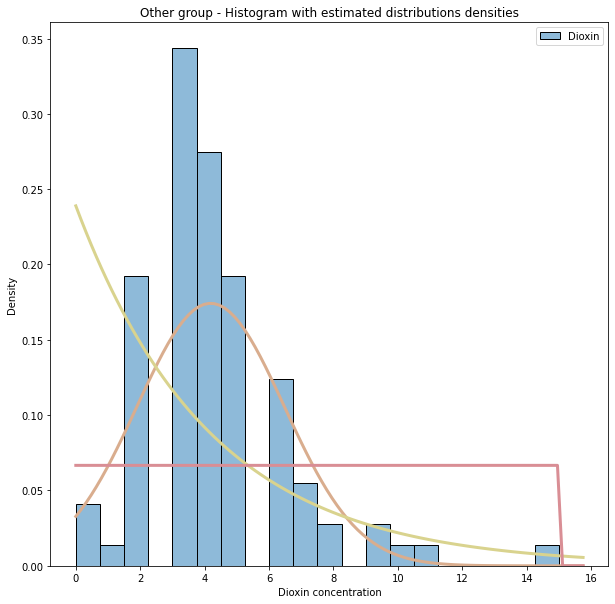

In [11]:
### other group - distributions density visualization

fig, ax = plt.subplots(figsize=(10, 10))
ax = sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    kde=False
)
ax = ax.set(
    title="Other group - Histogram with estimated distributions densities",
    xlabel="Dioxin concentration"
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(
    x_axis_values,
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
)
expon_distr_pdf = expon.pdf(
    x_axis_values,
    other_expon_distr_expected_value,
    other_expon_distr_std_deviance
)
uniform_distr_pdf = uniform.pdf(
    x_axis_values,
    other_uniform_distr_a,
    other_uniform_distr_b
)
sb.lineplot(
    x=x_axis_values,
    y=norm_distr_pdf,
    color="#d9ad8e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=expon_distr_pdf,
    color="#d9d38e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=uniform_distr_pdf,
    color="#d98e95",
    linewidth=3
)
plt.show()

#### Diskuze

Odhadli jsme parametry pro jednotlivá rozdělení a příslušné hustoty jsme zanesli do grafu histogramu. Na základě výše uvedené vizualizace jsme i zde odhadli, že pozorovaná data nejvíce odpovídají normálnímu rozdělení, zde je navíc mnohem zřejmější a o nejbližším rozdělení nemáme pochybnosti.

### Úkol 4
(1b) **Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.**

#### Generování náhodného výběru
Jelikož jsme v předchozím úkolu pro obě skupiny vybrali jako nejbližší rozdělení normální rozdělení, použili jsme pro generování náhodného výběru pro obě skupiny metodu [random.normal](https://numpy.org/doc/1.21/reference/random/generated/numpy.random.normal.html) z knihovny [NumPy](https://numpy.org/doc/1.21/index.html#). K tomu nám stačily v předchozím úkolu odhadnuté parametry střední hodnota a standardní odchylka pozorovaných dat.

#### Vietnam group

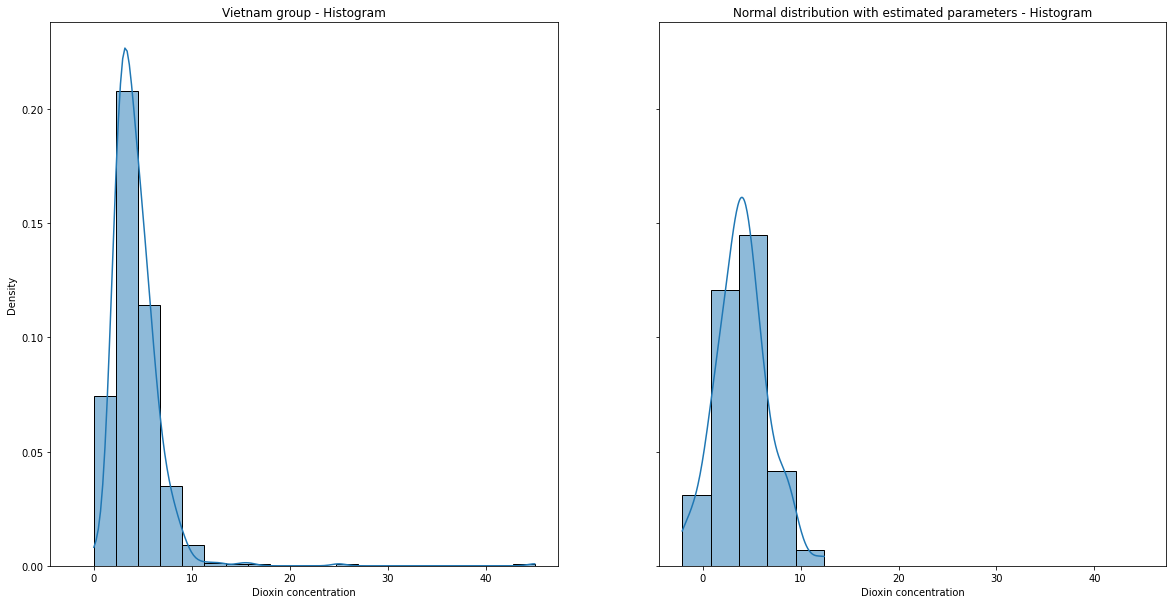

In [12]:
### vietnam group - data comparison

data_vietnam_simulated = np.random.normal(
    loc=viet_norm_distr_expected_value,
    scale=viet_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(20, 10)
)
ax1 = sb.histplot(
    data_vietnam,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_vietnam_simulated,
    bins=5,
    stat="density",
    kde=True,
    ax=ax2
)
ax1 = ax1.set(
    title="Vietnam group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Normal distribution with estimated parameters - Histogram",
    xlabel="Dioxin concentration"
)

#### Diskuze

Generovaný vzorek je poměrně malý, proto takto odhadnutý vzorek dat neodpovídá pozorovaným datům úplně přesně, což je ovšem vzhledem k velikosti obou vzorků očekávatelné.

#### Other group

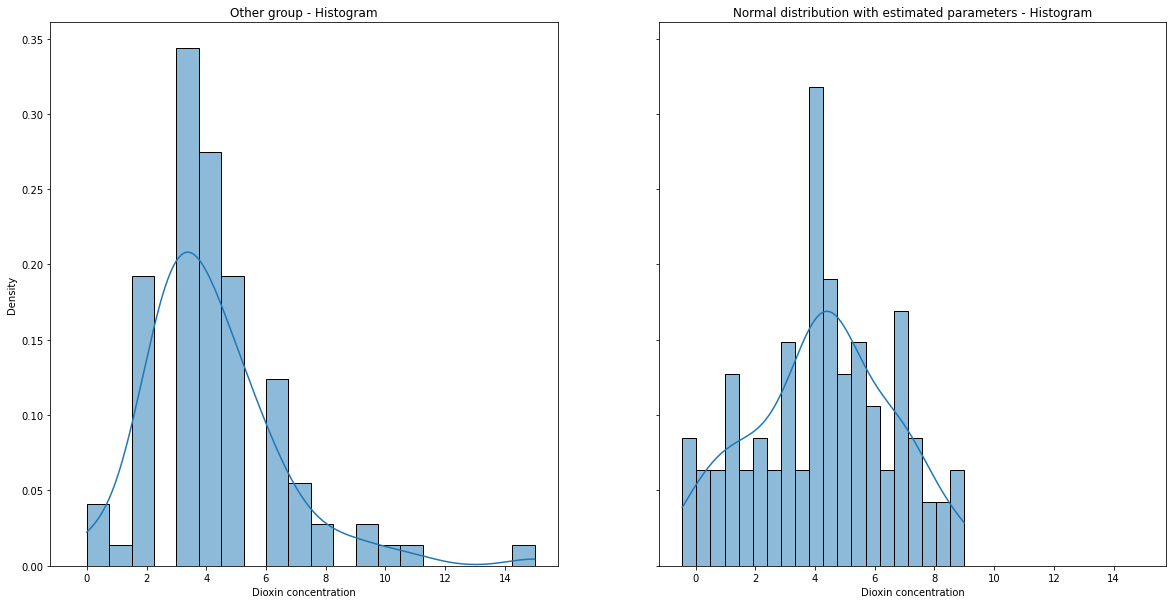

In [13]:
### other group - data comparison

data_other_simulated = np.random.normal(
    loc=other_norm_distr_expected_value,
    scale=other_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(20, 10)
)
ax1 = sb.histplot(
    data_other,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_other_simulated,
    bins=20,
    stat="density",
    kde=True,
    ax=ax2
)
ax1 = ax1.set(
    title="Other group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Normal distribution with estimated parameters - Histogram",
    xlabel="Dioxin concentration"
)

#### Diskuze

 U druhé skupiny je situace lepší, přestože vzorek původních pozorovaných dat je ještě daleko menší, než u první skupiny. Zde ovšem původní data více odpovídají normálnímu rozdělení s danými parametry a proto i náhodně vygenerovaná data s parametry daného normálního rozdělení původním datům odpovídá lépe.

### Úkol 5
(1b) **Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.**

Oboustranný intervalový odhad pro střední hodnotu normálního rozdělení *(to jsme odhadli v úkolu 3)* s neznámým rozptylem nalezneme pomocí kritických hodnot [Studentova t-rozdělení](https://en.wikipedia.org/wiki/Student%27s_t-distribution). Využijeme následující vzorec z přednášky:  
  
$$\large (L, U) = (\overline{X}_{n} - t_{\frac{\alpha}{2}, n-1} \frac{s_{n}}{\sqrt{n}}, \overline{X}_{n} + t_{\frac{\alpha}{2}, n-1} \frac{s_{n}}{\sqrt{n}})$$
  
Chceme 95 % interval, tedy:
$$\large 1 - \alpha = 0.95, $$  
$$\large \alpha = 0.05, $$  
$$\large \frac{\alpha}{2} = 0.025 $$  
Kritickou hodnotu $ t_{0.025, n-1} $ nalezneme pomocí funkce [students_t_distr.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) z balíčku SciPy, kde za n-1 dosadíme příslušný stupeň volnosti. Dále spočítáme hodnoty výběrového průměru a odmocninu z výběrového rozptylu. Po dosazení do vzorce dostaneme příslušný oboustranný konfidenční interval.

#### Vietnam group

- $ \overline{X}_{n} = 4.260061919504644 $
- $ s_{n} = 2.642617212650016 $
- $ n - 1 =  645 $
- $ \sqrt{n} = 25.39685019840059 $
- $ t_{\frac{\alpha}{2}, n-1} = 1.9636487184107028 $

In [14]:
### vietnam group - 95 % confidence interval for expected value

mean = data_vietnam.Dioxin.mean()
std = data_vietnam.Dioxin.std()
count = data_vietnam.Dioxin.count()
t = students_t_distr.ppf(q=1-0.025, df=count-1)
L_viet = mean - t * std / math.sqrt(count)
U_viet = mean + t * std / math.sqrt(count)
print(">>> (L, U) = ({}, {})".format(L_viet, U_viet))

>>> (L, U) = (4.05589668169332, 4.464227157315968)


#### Other group

- $ \overline{X}_{n} = 4.185567010309279 $
- $ s_{n} = 2.301855668564027 $
- $ n - 1 =  96 $
- $ \sqrt{n} = 9.848857801796104 $
- $ t_{\frac{\alpha}{2}, n-1} = 1.984984311431769 $

In [15]:
### other group - 95 % confidence interval for expected value

mean = data_other.Dioxin.mean()
std = data_other.Dioxin.std()
count = data_other.Dioxin.count()
t = students_t_distr.ppf(q=1-0.025, df=count-1)
L_other = mean - t * std / math.sqrt(count)
U_other = mean + t * std / math.sqrt(count)
print(">>> (L, U) = ({}, {})".format(L_other, U_other))

>>> (L, U) = (3.721640382345717, 4.64949363827284)


### Úkol 6

(1b) **Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.**

Testujeme hypotézu o střední hodnotě normálního rozdělení proti oboustranné alternativě, tedy  
  
$$ \large H_{0} : \mu = K = 15 \hspace{0.5cm} proti \hspace{0.5cm} H_{A} : \mu \neq K = 15 $$  
  
Potřebujeme tedy oboustranný $ (1 - \alpha) \% $ interval spolehlivosti. Jelikož stále neznáme rozptyl daného rozdělení a 95% interval spolehlivosti jsme si spočítali v minulém úkolu pomocí Studentova t-rozdělení, můžeme ho nyní využít.

#### Vietnam group

Interval spolehlivosti vypočtený v minulém úkolu pro tuto skupinu  
  
$$\large (L, U) = (4.05589668169332, 4.464227157315968) $$  
  
Testovanou hodnotu  
  
$$\large \mu_{0} = K = 15 $$  
  
interval nepokrývá a tedy $ H_{0} $ na hladině významnosti 5 % zamítneme a přijeme alternativní hypotézu $ H_{A} $ .

In [16]:
### vietnam_group - testing hypothesis for expected value

K = 15
viet_statistic, viet_pvalue = ttest_1samp(
    data_vietnam.Dioxin,
    K,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(viet_statistic, viet_pvalue))

>>> t-statistic = -103.29606486224891, p-value = 0.0


Jen pro kontrolu jsme ještě vyzkoušeli funkci [ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) opět z knihovny SciPy pro otestování naší hypotézy, která spočítá oboustranný T-test pro nulovou hypotézu, že střední hodnota poskytnutých dat je rovna zadané hodnotě. Zajímá nás druhá návratová hodnota `pvalue`, což je velmi zjednodušeně pravděpodobnost, že uděláme chybu v případě zamítnutí nulové hypotézy. Jelikož `pvalue` je v tomto případě menší než zadaná hladina významnosti (0.05) tak nulovou hypotézu zamítneme a přijemem alternativní hypotézu, což je očekávaný výsledek. 

#### Other group

Interval spolehlivosti vypočtený v minulém úkolu pro tuto skupinu  
  
$$\large (L, U) = (3.721640382345717, 4.64949363827284) $$  
  
Testovanou hodnotu  
  
$$\large \mu_{0} = K = 15 $$  
  
interval nepokrývá a tedy $ H_{0} $ na hladině významnosti 5 % zamítneme a přijeme alternativní hypotézu $ H_{A} $ .

In [17]:
### other group - testing hypothesis for expected value

K = 15
other_statistic, other_pvalue = ttest_1samp(
    data_other.Dioxin,
    K,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(other_statistic, other_pvalue))

>>> t-statistic = -46.27128198222826, p-value = 1.9220186618312877e-67


I zde je výsledek `pvalue` menší než zadaná hladina významnosti a proto jsme opět ve prospěch alternativní hypotézy nulovou hypotézu zamítnuli.

### Úkol 7
(2b) **Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.**

Chceme porovnat střední hodnotu obou skupin dat. Předpokládáme, že tyto skupiny jsou vzájemně nezávislé. Úkolem je zjistit, zda jsou střední hodnoty obou skupin stejné, nebo se výrazně liší. Označíme střední hodnotu skupiny veteránu z Vietnamu jako $ \mu_{0} $ a střední hodnotu skupiny veteránů, kteří ve Vietnamu nebyli jako $ \mu_{1} $. V předchozích úkolech jsme odhadli, že skupiny jsou normálně rozdělené a nyní navíc předpokládáme, že jsou skupiny vzájemně nezávislé (což v tomto případě dává smysl, jelikož u obou skupin předpokládáme, že koncentrace Dioxinu v jejich krevních vzorcích nepochází ze stejného zdroje). Použijeme dvouvýběrový test. Testujeme tedy nulovou hypotézu proti oboustranné alternativě.  
  
$$\large H_{0} : \mu_{0} = \mu_{1} \hspace{0.5cm} proti \hspace{0.5cm} H_{A} : \mu_{0} \neq \mu_{a} $$  
  
Jelikož rozptyl obou rozdělení neznáme a používáme pouze jeho odhad pomocí výběrového rozptylu, musíme použít variantu dvouvýběrového testu, kde se rovnost rozptylů daných rozdělení nepředpokládá. Pro otestování použijeme funkci [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) z balíčku SciPy. Protože rozptyly rozdělení se tedy rovnat nemusejí nastavíme parametr `equal_var=False` a knihovní funkce tak provede [Welch's ttest](https://en.wikipedia.org/wiki/Welch%27s_t-test).

In [19]:
#### vietnam and other group - testing hypothesis for expected value equality

statistic, pvalue = ttest_ind(
    data_vietnam.Dioxin,
    data_other.Dioxin,
    equal_var=False,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(statistic, pvalue))

>>> t-statistic = 0.2912216209327345, p-value = 0.771322407561552


Výsledná hodnota `pvalue` je větší než zadaná hladina významnosti, proto na dané hladině významnosti $ \alpha = 0.05 $ nulovou hypotézu nezamítáme, jelikož pro to nemáme dostatek důkazů a tedy střední hodnoty obou skupin se na dané hladině významnosti rovnají.